In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted
import seaborn as sns
import matplotlib.patches as mpatches
import h5py
import matplotlib

In [2]:
# read accuracy data for all acoustic features
acc = pd.read_csv("data\\acoustics\\acoustic_features_accuracies.csv")
acc = acc[acc.columns[0:-1]]

In [3]:
# get colors
features_names = acc.columns
pal = sns.color_palette("muted", 10)
er = np.asarray([i for i in pal.as_hex()])
dic = {}
for i, j in zip(features_names,er):
    dic[i] = j
colors = np.asarray([dic[i] for i in dic.keys()])

In [4]:
# format data for plotting
acc2 = acc.values.T.reshape((10,8,10))
data =acc2.copy()
colfirst = colors[np.argsort(np.mean(data[:,0,:],1))]
data1 = data[:,0,:][np.argsort(np.mean(data[:,0,:],1))]
dic_rev = dict((v, k) for k, v in dic.items())
posi = np.asarray([dic_rev[i] for i in colfirst])
data2 = data[:,2,:][np.argsort(np.mean(data[:,0,:],1))]
data3 = data[:,3,:][np.argsort(np.mean(data[:,0,:],1))]
data4 = data[:,4,:][np.argsort(np.mean(data[:,0,:],1))]

In [5]:
# legend aestetics
c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 =colors
lab1,lab2,lab3,lab4,lab5,lab6,lab7,lab8,lab9,lab10=posi
edgco = 'k'
p1 = mpatches.Patch(facecolor=c1, label=lab1,edgecolor=edgco)
p2 = mpatches.Patch(facecolor=c2, label=lab2,edgecolor=edgco)
p3 = mpatches.Patch(facecolor=c3, label=lab3,edgecolor=edgco)
p4 = mpatches.Patch(facecolor=c4, label=lab4,edgecolor=edgco)
p5 = mpatches.Patch(facecolor=c5, label=lab5,edgecolor=edgco)
p6 = mpatches.Patch(facecolor=c6, label=lab6,edgecolor=edgco)
p7 = mpatches.Patch(facecolor=c7, label=lab7,edgecolor=edgco)
p8 = mpatches.Patch(facecolor=c8, label=lab8,edgecolor=edgco)
p9 = mpatches.Patch(facecolor=c9, label=lab9,edgecolor=edgco)
p10 = mpatches.Patch(facecolor=c10, label=lab10,edgecolor=edgco)

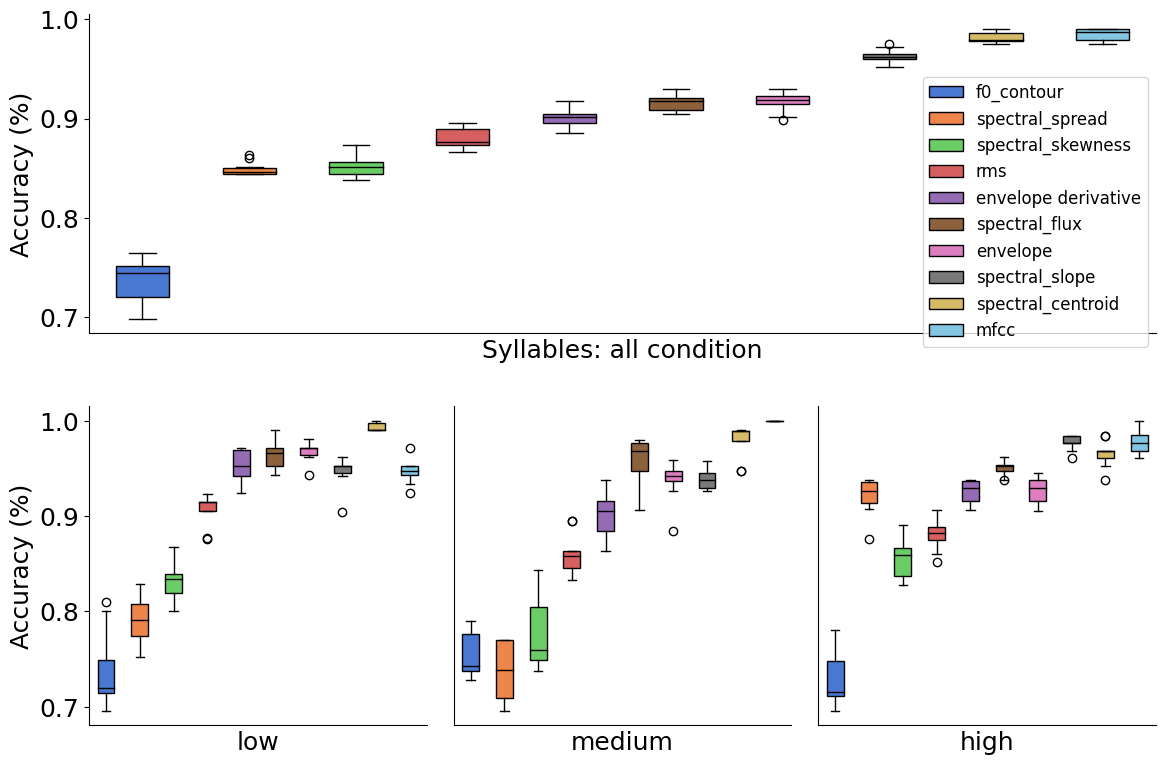

In [6]:
figure_mosaic = """
AAAAAA
BBCCDD
"""
matplotlib.rcParams.update({'font.size': 18})
fig,axes = plt.subplot_mosaic(mosaic = figure_mosaic, figsize = (12,8))
a=-1
for label, ax in axes.items():
    a+=1
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel('Accuracy (%)');
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    if a >1: 
        ax.set_ylabel('');
        ax.yaxis.set_visible(False)

box1 = axes["A"].boxplot(data1.T,patch_artist=True)
for patch, color in zip(box1['boxes'], colors):
        patch.set_facecolor(color)
for element in box1['medians']:
        element.set_color('k')
axes["A"].set_xticks([])
axes["A"].set_xlabel('Syllables: all condition')

box2 = axes["B"].boxplot(data2.T,patch_artist=True)
for patch, color in zip(box2['boxes'], colors):
        patch.set_facecolor(color)
for element in box2['medians']:
        element.set_color('k')
axes['B'].set_xticks([])
axes["B"].set_xlabel('low')

box3 = axes["C"].boxplot(data3.T,patch_artist=True)
for patch, color in zip(box3['boxes'], colors):
        patch.set_facecolor(color)
for element in box3['medians']:
        element.set_color('k')
axes['C'].set_xticks([])
axes["C"].set_xlabel('medium')

box4 = axes["D"].boxplot(data4.T,patch_artist=True)
for patch, color in zip(box4['boxes'], colors):
        patch.set_facecolor(color)
for element in box4['medians']:
        element.set_color('k')
axes['D'].set_xticks([])
axes["D"].set_xlabel('high')

axes["A"].legend(bbox_to_anchor=(1., 0.83),handles=[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10],fontsize=12);
plt.tight_layout()
#fig.savefig( "all_features_classif_acoustic_syllable.png",  dpi=300, format=None, metadata=None,facecolor='white', edgecolor='white' , bbox_inches='tight')

In [20]:
doti = np.mean(data[:,2:5,:],1)
er = doti[np.argsort(np.mean(doti,1))]
dote = np.mean(data[:,5::,:],1)
ery = dote[np.argsort(np.mean(dote,1))]
dic = {'colour': colors,
      'feature':features_names[np.argsort(np.mean(doti,1))] }
df_call = pd.DataFrame.from_dict(dic)

In [21]:
# create dataframe formatted for R
syllabic_df = pd.DataFrame(er.T, columns = [i for i in dic['feature']])
namos = np.repeat(syllabic_df.columns,10)
datos = syllabic_df.values.T.reshape((10*10))
df_r_syll = pd.DataFrame(data =np.asarray([namos,datos]).T, columns = ['features','accuracies'])
#df_r_syll.to_csv("syllabic_accuracy_scores.csv",index=None)

In [22]:
new_col = [df_call.loc[df_call['feature'] == i]['colour'].values[0] for i in features_names[np.argsort(np.mean(dote,1))]]
c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 =colors
lab1,lab2,lab3,lab4,lab5,lab6,lab7,lab8,lab9,lab10=features_names[np.argsort(np.mean(doti,1))]

In [23]:
# create dataframe formatted for R
names_feat = [df_call.loc[df_call['colour'] == i]['feature'].values[0] for i in new_col]
phonemic_df = pd.DataFrame(ery.T, columns = names_feat)
namos2 = np.repeat(phonemic_df.columns,10)
datos2 = phonemic_df.values.T.reshape((10*10))
df_r_phon = pd.DataFrame(data =np.asarray([namos2,datos2]).T, columns = ['features','accuracies'])
#df_r_phon.to_csv("phonemic_accuracy_scores.csv",index=None)

In [24]:
edgco = 'k'
p1 = mpatches.Patch(facecolor=c1, label=lab1,edgecolor=edgco)
p2 = mpatches.Patch(facecolor=c2, label=lab2,edgecolor=edgco)
p3 = mpatches.Patch(facecolor=c3, label=lab3,edgecolor=edgco)
p4 = mpatches.Patch(facecolor=c4, label=lab4,edgecolor=edgco)
p5 = mpatches.Patch(facecolor=c5, label=lab5,edgecolor=edgco)
p6 = mpatches.Patch(facecolor=c6, label=lab6,edgecolor=edgco)
p7 = mpatches.Patch(facecolor=c7, label=lab7,edgecolor=edgco)
p8 = mpatches.Patch(facecolor=c8, label=lab8,edgecolor=edgco)
p9 = mpatches.Patch(facecolor=c9, label=lab9,edgecolor=edgco)
p10 = mpatches.Patch(facecolor=c10, label=lab10,edgecolor=edgco)

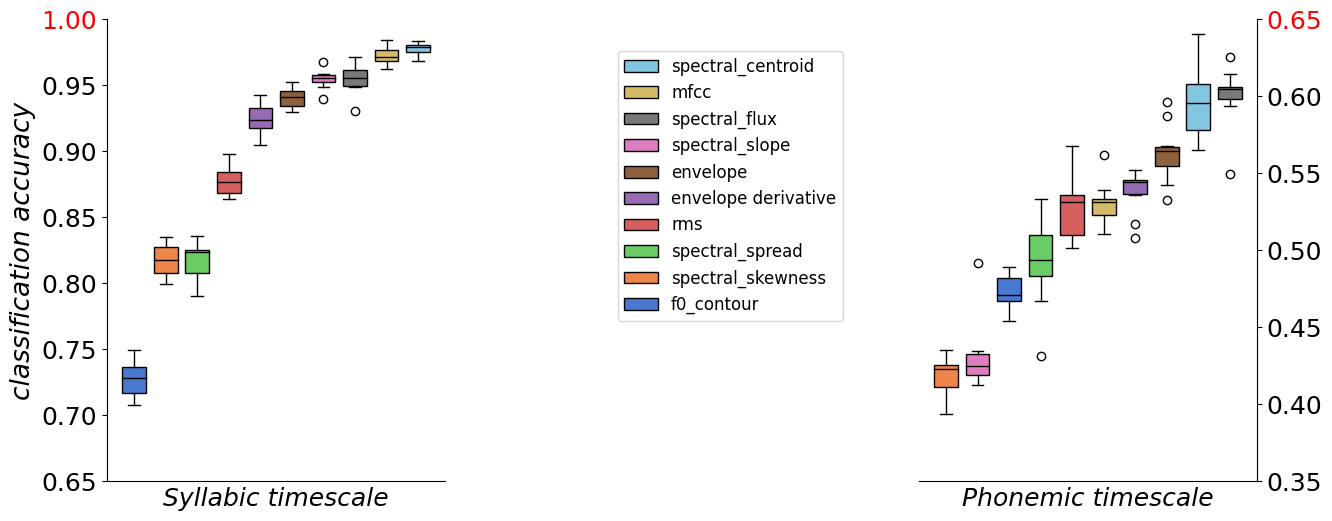

In [25]:
matplotlib.rcParams.update({'font.size': 18})

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (23,6))

box1 = ax1.boxplot(er.T,patch_artist=True, widths = 1.5, positions=[1,3,5,7,9,11,13,15,17,19])
for patch, color in zip(box1['boxes'], colors):
        patch.set_facecolor(color)
for element in box1['medians']:
        element.set_color('k')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylim(0.65,1)
ax1.set_xticks([]);
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter());
ax1.set_ylabel("classification accuracy",fontsize=19,fontstyle='italic');
ax1.set_xlabel("Syllabic timescale",fontsize=18,fontstyle='italic');
ax1.legend(bbox_to_anchor=(2.2, 0.95),handles=[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10][::-1],fontsize=12);
ax1.get_yticklabels()[-1].set_color('red') 
ax2.set_visible(False)

box2 = ax3.boxplot(ery.T,patch_artist=True, widths = 1.5, positions=[1,3,5,7,9,11,13,15,17,19])
for patch, color in zip(box2['boxes'], new_col):
        patch.set_facecolor(color)
for element in box2['medians']:
        element.set_color('k')

ax3.set_ylim(0.65,1)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylim(0.35,0.65)
ax3.set_xticks([]);
ax3.set_xlabel("Phonemic timescale",fontsize=18,fontstyle='italic');
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter());
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
fig.subplots_adjust(left=0.5, bottom=None, right=1, top=None, wspace=None, hspace=-10)
plt.gca().get_yticklabels()[-1].set_color('red') 
#fig.savefig("syllabic_vs_phonemic_acoustic_classif.png",  dpi=300, format=None, metadata=None,facecolor='white', edgecolor='white' , bbox_inches='tight')
